# Proyek Analisis Data: [Bike-Sharing Dataset]
- **Nama:** Anisya Nugraheni Fauziyyah
- **Email:** anisyanugraheni@mal.ugm.ac.id
- **ID Dicoding:**  anisya_nugraheni_fauziyyah_gvBu

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat antusiasme pelanggan setiap  harinya  untuk meminjam sepeda   dalam  skala jam
- Bagaimana persebaran pelanggan berdasarkan jenis hari (workingday atau tidak)  dalam meminjam  sepeda

## Menyiapkan semua library yang dbutuhkan

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data

Berikut merupakan data pelanggan berdasarkan hari

In [ ]:
day =  pd.read_csv('https://raw.githubusercontent.com/nisyyyyyyyyy/Analisis-Data/main/day.csv' )
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Berikut merupakan data pelanggan berdasarkan jumlah jam

In [ ]:
hour =pd.read_csv('https://raw.githubusercontent.com/nisyyyyyyyyy/Analisis-Data/main/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Diambil kolom-kolom data yang diperlukan

In [ ]:
day1    =day[["dteday","weekday"]]
day1.head()


,dteday,weekday
0,2011-01-01,6
1,2011-01-02,0
2,2011-01-03,1
3,2011-01-04,2
4,2011-01-05,3


In [ ]:
day3 =day[["dteday","workingday"]]
day3.head()


,dteday,workingday
0,2011-01-01,0
1,2011-01-02,0
2,2011-01-03,1
3,2011-01-04,1
4,2011-01-05,1


In [ ]:
hour1= hour[["dteday","weekday"  ]]
hour1.head()

,dteday,weekday
0,2011-01-01,6
1,2011-01-01,6
2,2011-01-01,6
3,2011-01-01,6
4,2011-01-01,6


In [ ]:
merged_df = pd.merge( day1 , hour1  , how='left', left_on=  'weekday', right_on=     'weekday' )

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814909 entries, 0 to 1814908
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   dteday_x  object
 1   weekday   int64 
 2   dteday_y  object
dtypes: int64(1), object(2)
memory usage: 55.4+ MB


In [ ]:
merged_df.head()

,dteday_x,weekday,dteday_y
0,2011-01-01,6,2011-01-01
1,2011-01-01,6,2011-01-01
2,2011-01-01,6,2011-01-01
3,2011-01-01,6,2011-01-01
4,2011-01-01,6,2011-01-01


### Assessing Data

In [ ]:
 day1.isnull().sum()

dteday     0
weekday    0
dtype: int64

In [ ]:
hour1.isnull().sum()

dteday     0
weekday    0
dtype: int64

In [ ]:
 day1.duplicated().sum()

0

In [ ]:
hour1.duplicated().sum()

16648

### Cleaning Data

Menghapus data duplikat pada hour1

In [ ]:
hour1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dteday   17379 non-null  object
 1   weekday  17379 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 271.7+ KB


In [ ]:
print('\n',  hour1.describe(include='all'))


             dteday       weekday
count        17379  17379.000000
unique         731           NaN
top     2011-01-01           NaN
freq            24           NaN
mean           NaN      3.003683
std            NaN      2.005771
min            NaN      0.000000
25%            NaN      1.000000
50%            NaN      3.000000
75%            NaN      5.000000
max            NaN      6.000000


In [ ]:
 hour2 =  hour1.drop_duplicates(subset=['dteday'])

In [ ]:
 hour2.duplicated().sum()

0

In [ ]:
 hour2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 17355
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dteday   731 non-null    object
 1   weekday  731 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.1+ KB


## Exploratory Data Analysis (EDA)

In [ ]:
print('\n',  day1.describe(include='all'))


             dteday     weekday
count          731  731.000000
unique         731         NaN
top     2011-01-01         NaN
freq             1         NaN
mean           NaN    2.997264
std            NaN    2.004787
min            NaN    0.000000
25%            NaN    1.000000
50%            NaN    3.000000
75%            NaN    5.000000
max            NaN    6.000000


In [ ]:
print('\n',  hour2.describe(include='all'))


             dteday     weekday
count          731  731.000000
unique         731         NaN
top     2011-01-01         NaN
freq             1         NaN
mean           NaN    2.997264
std            NaN    2.004787
min            NaN    0.000000
25%            NaN    1.000000
50%            NaN    3.000000
75%            NaN    5.000000
max            NaN    6.000000


## Visualization & Explanatory Analysis










### Pertanyaan 1:Bagaimana tingkat antusiasme pelanggan setiap  harinya  untuk meminjam sepeda   dalam  skala jam   

<ipython-input-91-7ac99c87d59e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pm = sns.barplot(x= hour.index,


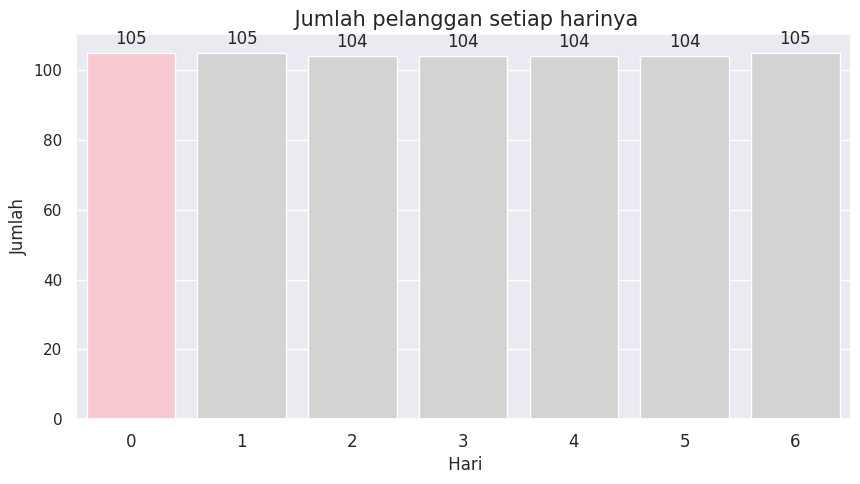

In [ ]:
hour  =  hour2['weekday'].value_counts().sort_index()

most_common_score =  hour.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
pm = sns.barplot(x= hour.index,
                 y= hour.values,
                 palette=["pink" if score == most_common_score else "#D3D3D3" for score in  hour.index]
                 )

plt.title(" Jumlah pelanggan setiap harinya", fontsize=15)
plt.xlabel(" Hari")
plt.ylabel("Jumlah")
plt.xticks(fontsize=12)
for p in pm.patches:
    pm.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Berdasarkan grafik diatas menunjukkan bahwa pelanggan lebih banyak meminjam sepeda pada hari minggu dan senin. Namun grafik ini cenderung konstan sehingga dapat dikatakan bahwa  jumlah pelanggan yang peminjam sepeda relatif konstan.

### Pertanyaan 2: Bagaimana persebaran  pelanggan  berdasarkan jenis hari (workingday atau tidak)  dalam meminjam  sepeda    

---



In [ ]:
bystate_df =    day3.groupby(by= "workingday").dteday.nunique().reset_index()
bystate_df.rename(columns={
      "dteday":    "day_count"
}, inplace=True)
bystate_df.head()

,workingday,day_count
0,0,231
1,1,500


<ipython-input-93-a161bf1ec04e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday',


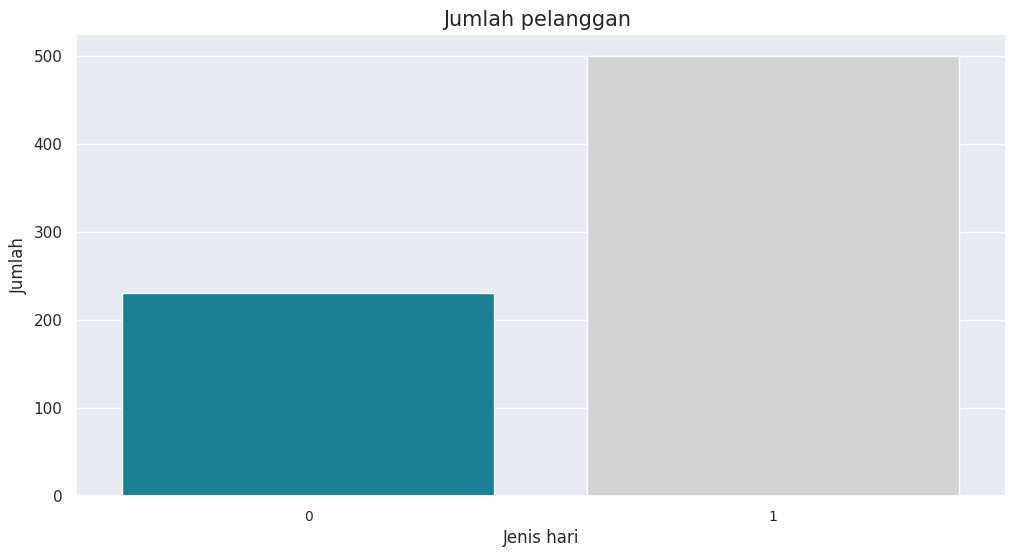

In [ ]:
plt.figure(figsize=(12, 6))


most_common_state = bystate_df.loc[bystate_df['day_count'].idxmax(), 'workingday']

bystate_df = bystate_df.sort_values(by='day_count', ascending=False  )


sns.barplot(x='workingday',
            y='day_count',
            data=bystate_df,
            palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in bystate_df['workingday']]
            )

plt.title("Jumlah pelanggan ", fontsize=15)
plt.xlabel("Jenis hari")
plt.ylabel("Jumlah")
plt.xticks(fontsize=10)




plt.show()

Berdasarkan grafik diatas dapat dilihat bahwa pada workingday jumlah pelanggan lebih banyak dibandingkan dengan jumlah pelanggan diluar workingday.

## Conclusion

 Dengan demikian. dapat disimpulkan bahwa jumlah pelanggan setiap harinya konstan dan lebih banyak di workingday daripada diluar workingday.






In [98]:
day1.to_csv('day1.csv', index=False)

In [99]:
hour1.to_csv('hour1.csv', index=False)